### train 1k와 test 1k <- SVM

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
train = pd.read_csv("../Data/train_1k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train[0].describe()

count    1001.000000
mean        4.447552
std         2.883313
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: 0, dtype: float64

In [4]:
# train[0]의 숫자 빈도
train[0].value_counts()

7    117
1    116
4    105
9    100
2     99
0     98
6     94
3     93
5     92
8     87
Name: 0, dtype: int64

In [5]:
# data랑 label 나누기이이이이이이이ㅣ
# 쌤 코드으으으
# train_data = train.loc[:, train.columns != 0]
# train_label = train.loc[:, train.columns == 0]
train_data = train.drop(0, axis=1)
train_label = train[0]

In [6]:
# train data의 내용 보기
import numpy as np

temp = np.array(train.loc[0, train.columns != 0])
print(temp.reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
# train data의 내용 줄여보기
tempColumns = []
temp1 = temp.reshape(28,28)
count = 0
for i in range(0,29):
  if i % 2 == 1:
    for j in range(0,29):
      if j % 2 == 1:
        tempColumns.append(temp1[i,j])
        count+=1
count        

196

In [8]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [9]:
# test도 나누기
test_data = test.drop(0, axis=1)
test_label = test[0]

In [10]:
# 학습하기
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [11]:
clf.score(test_data, test_label)

0.8751248751248751

---
### train 1k와 test 1k <- SVM, log

In [12]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 시각화를 통한 Log의 필요성 확인
import matplotlib.pyplot as plt

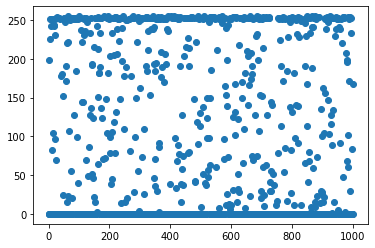

In [15]:
plt.scatter(train_data.index, train_data[300])
plt.show()

### 로그변환 이유
로그는 태생적으로 큰값을 작게 표기하기 위해 고안된 방법이며, 측정단위를 키우는 것만으로도 해결하지 못한 부분을 해결해준다.

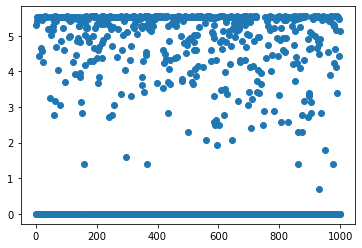

In [16]:
plt.scatter(train_data.index, np.log1p(train_data[300]))
plt.show()

### np.log1p
기본적으로 log안의 x값은 양수만 가능하다.   
하지만 0에 가까운 아주 작은 양수는 (예: 0.0000000001)    
음의 무한대에 가까워지게 된다 (-inf)   
이를 방지하기 위해 1을 더함으로써 0보다 큰 양수의 값을 갖게 된다

In [17]:
# Data 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
test_data = pd.DataFrame(np.log1p(test_data))
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [20]:
clf.score(test_data,test_label)

0.8901098901098901

---
# train_10k

In [21]:
train = pd.read_csv("../Data/train_10k.csv", header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_data = train.drop(0, axis=1)
train_label = train[0]

In [23]:
train_label.head()

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64

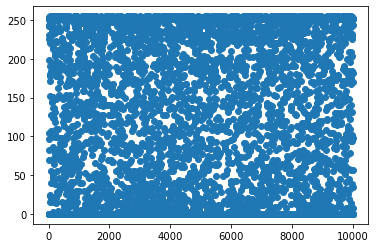

In [24]:
plt.scatter(train_data.index, (train_data[300]))

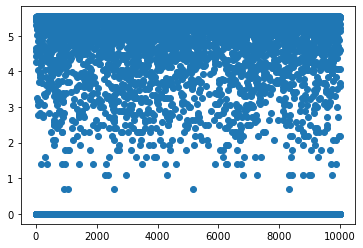

In [25]:
plt.scatter(train_data.index, np.log1p(train_data[300]))

In [26]:
# Data 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [28]:
clf.score(test_data, test_label)

0.958041958041958

---
# train_20k

In [29]:
train = pd.read_csv("../Data/train_20k.csv", header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train_data = train.drop(0, axis=1)
train_label = train[0]

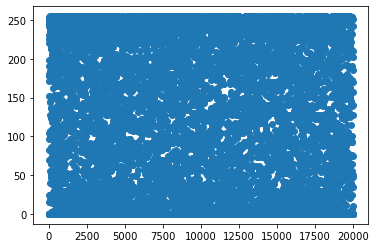

In [31]:
plt.scatter(train_data.index, (train_data[300]))

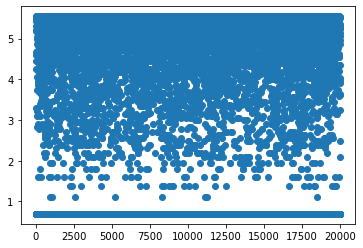

In [32]:
plt.scatter(train_data.index, np.log1p(train_data[300] + 1))

In [33]:
# Data 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [35]:
clf.score(test_data, test_label)

0.965034965034965